In [1]:
class function:
    def model(self, X_train, y_train):
        model_LR = LogisticRegression()
        model_LSVC = LinearSVC()
        model_SVC = SVC(probability=True)
        model_RFC = RandomForestClassifier()

        model_LR.fit(X_train, y_train)
        model_LSVC.fit(X_train, y_train)
        model_SVC.fit(X_train, y_train)
        model_RFC.fit(X_train, y_train)

        y_predLR = model_LR.predict(X_test)
        y_predLSVC = model_LSVC.predict(X_test)
        y_predSVC = model_SVC.predict(X_test)
        y_predRFC = model_RFC.predict(X_test)

        print('ロジステック回帰 混同行列:', confusion_matrix(y_predLR, y_test))
        print('サポートベクトルマシン 混同行列:', confusion_matrix(y_predLSVC, y_test))
        print('サポートベクトルマシン(カーネル法) 混同行列:', confusion_matrix(y_predSVC, y_test))
        print('ランダムフォレスト 混同行列:', confusion_matrix(y_predRFC, y_test))
        print()
        print('ロジステック回帰 正解率:', accuracy_score(y_predLR, y_test))
        print('サポートベクトルマシン 正解率:', accuracy_score(y_predLSVC, y_test))
        print('サポートベクトルマシン(カーネル法) 正解率:', accuracy_score(y_predSVC, y_test))
        print('ランダムフォレスト 正解率:', accuracy_score(y_predRFC, y_test))
        print()
        print('ロジステック回帰 適合率:', precision_score(y_predLR, y_test))
        print('サポートベクトルマシン 適合率:', precision_score(y_predLSVC, y_test))
        print('サポートベクトルマシン(カーネル法) 適合率:', precision_score(y_predSVC, y_test))
        print('ランダムフォレスト 適合率:', precision_score(y_predRFC, y_test))
        print()
        print('ロジステック回帰 再現率:', recall_score(y_predLR, y_test))
        print('サポートベクトルマシン 再現率:', recall_score(y_predLSVC, y_test))
        print('サポートベクトルマシン(カーネル法) 再現率:', recall_score(y_predSVC, y_test))
        print('ランダムフォレスト 再現率:', recall_score(y_predRFC, y_test))
        print()
        print('ロジステック回帰 F値:', f1_score(y_predLR, y_test))
        print('サポートベクトルマシン F値:', f1_score(y_predLSVC, y_test))
        print('サポートベクトルマシン(カーネル法) F値:', f1_score(y_predSVC, y_test))
        print('ランダムフォレスト F値:', f1_score(y_predRFC, y_test))
    
    def roc_auc(self, model, title_model):
        y_pred_proba = model.predict_proba(X_train)
        fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba[:, 1])
        roc_auc_score_value = roc_auc_score(y_train, y_pred_proba[:, 1])

        plt.figure()
        plt.plot([0,1], [0,1], color='gray', linestyle='--')
        plt.plot(fpr, tpr, marker='o', label='ROC curve (AUC = %0.2f)' % roc_auc_score_value)
        plt.xlabel('FPR: False Positive Rate')
        plt.ylabel('TPR: True Positive Rate')
        plt.title(title_model + ' Receiver operating characteristic')
        plt.legend(loc='lower right')
        plt.show()
        
    def parameter_search(self, X_train, y_train):
        cv = KFold(5, shuffle=True)

        best_score = 0
        best_params = {}
        print('Logistic')
        for max_iter in [30, 70, 100, 130]:
            for tol in [0.0001, 0.0005, 0.001]:
                model_LR = LogisticRegression(max_iter=max_iter, tol=tol)
                scores = cross_val_score(model_LR, X_train, y_train, cv=cv, scoring='accuracy')
                mean_score = scores.mean()

                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {'max_iter': max_iter, 'tol':tol}
        print(scores)
        print('Best parameters:', best_params)
        print('Best cross-validation accuracy:', best_score)

        best_score = 0
        best_params = {}
        print('LSVC')
        for max_iter in [800, 900, 1000, 1100, 1200]:
            for C in [0.01, 0.1, 0.5, 1, 1.5]:
                for tol in [0.0001, 0.0005, 0.001]:
                    model_LSVC = LinearSVC(max_iter=max_iter, C=C, tol=tol)
                    scores = cross_val_score(model_LSVC, X_train, y_train, cv=cv, scoring='accuracy')
                    mean_score = scores.mean()

                    if mean_score > best_score:
                        best_score = mean_score
                        best_params = {'max_iter': max_iter, 'C':C, 'tol':tol}
        print(scores)
        print('Best parameters:', best_params)
        print('Best cross-validation accuracy:', best_score)

        best_score = 0
        best_params = {}
        print('SVC')
        for C in [0.01, 0.1, 1, 10, 100]:
            for gamma in [1, 3, 5, 6, 10, 15]:
                model_LSVC = SVC(C=C, gamma=gamma)
                scores = cross_val_score(model_SVC, X_train, y_train, cv=cv, scoring='accuracy')
                mean_score = scores.mean()

                if mean_score > best_score:
                            best_score = mean_score
                            best_params = {'C': C, 'gamma': gamma}
        print(scores)
        print('Best parameters:', best_params)
        print('Best cross-validation accuracy:', best_score)

        best_score = 0
        best_params = {}
        print('RandomForest')
        for max_depth in range(1, 11):
            for n_estimators in [1, 10, 100]:
                for random_state in [0, 1, 3, 5]:
                    for criterion in ['gini', 'entropy']:
                        model_RFC = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=random_state)
                        scores = cross_val_score(model_RFC, X_train, y_train, cv=cv, scoring='accuracy')
                        mean_score = scores.mean()

                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {'max_depth': max_depth, 'n_estimators': n_estimators, 'random_state': random_state, 'criterion': criterion}
        print(scores)
        print('Best parameters:', best_params)
        print('Best cross-validation accuracy:', best_score)

HeartDisease  
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'


data = '/Users/black/Downloads/Data/kaggle/heartdisease/heart.csv'
df = pd.read_csv(data)
print(df.columns)
print(df.shape)

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope']]
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Function = function()

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
(918, 12)


In [3]:
Function.model(X_train, y_train)

ロジステック回帰 混同行列: [[69 13]
 [19 83]]
サポートベクトルマシン 混同行列: [[75 24]
 [13 72]]
サポートベクトルマシン(カーネル法) 混同行列: [[60 30]
 [28 66]]
ランダムフォレスト 混同行列: [[73  9]
 [15 87]]

ロジステック回帰 正解率: 0.8260869565217391
サポートベクトルマシン 正解率: 0.7989130434782609
サポートベクトルマシン(カーネル法) 正解率: 0.6847826086956522
ランダムフォレスト 正解率: 0.8695652173913043

ロジステック回帰 適合率: 0.8645833333333334
サポートベクトルマシン 適合率: 0.75
サポートベクトルマシン(カーネル法) 適合率: 0.6875
ランダムフォレスト 適合率: 0.90625

ロジステック回帰 再現率: 0.8137254901960784
サポートベクトルマシン 再現率: 0.8470588235294118
サポートベクトルマシン(カーネル法) 再現率: 0.7021276595744681
ランダムフォレスト 再現率: 0.8529411764705882

ロジステック回帰 F値: 0.8383838383838385
サポートベクトルマシン F値: 0.7955801104972374
サポートベクトルマシン(カーネル法) F値: 0.6947368421052632
ランダムフォレスト F値: 0.8787878787878787


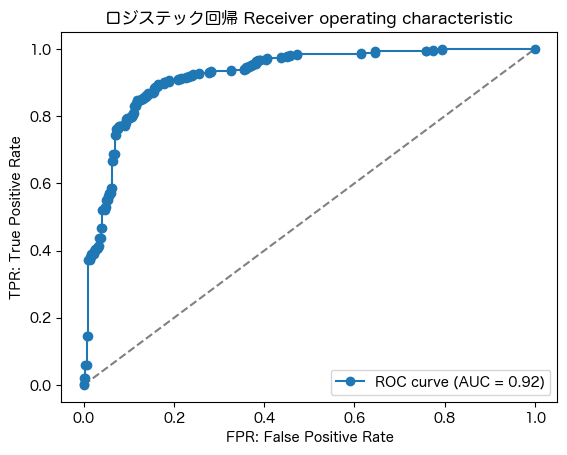

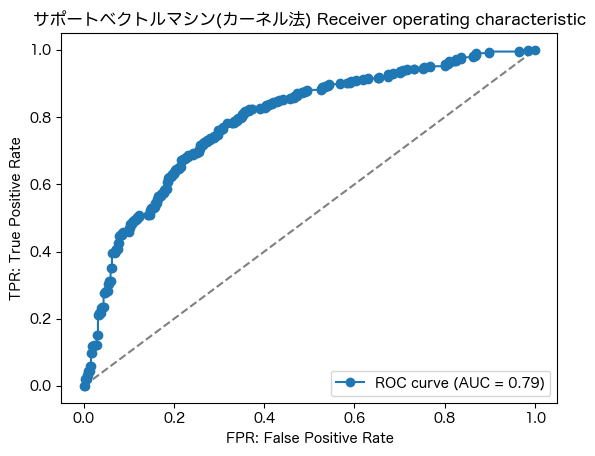

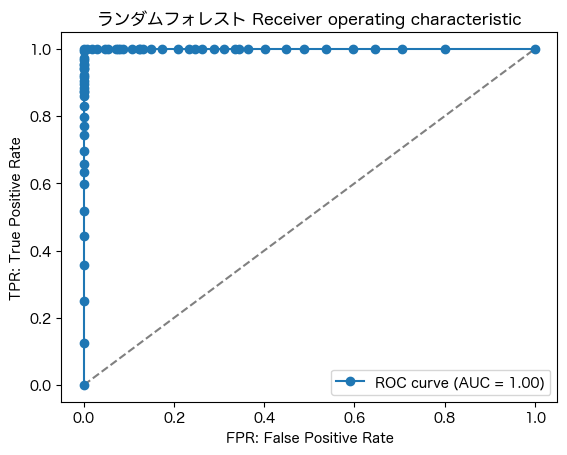

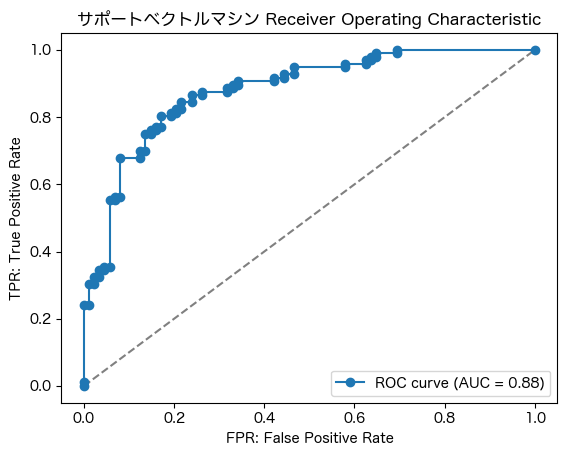

In [4]:
model_LR = LogisticRegression().fit(X_train, y_train)
model_LSVC = LinearSVC().fit(X_train, y_train)
model_SVC = SVC(probability=True).fit(X_train, y_train)
model_RFC = RandomForestClassifier().fit(X_train, y_train)

Function.roc_auc(model_LR, title_model='ロジステック回帰')
Function.roc_auc(model_SVC, 'サポートベクトルマシン(カーネル法)')
Function.roc_auc(model_RFC, title_model='ランダムフォレスト')

#サポートベクトルマシンLSVC
clf = CalibratedClassifierCV(model_LSVC)
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.plot(fpr, tpr, marker='o', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('FPR: False Positive Rate')
plt.ylabel('TPR: True Positive Rate')
plt.title('サポートベクトルマシン Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [5]:
cv = KFold(5, shuffle=True)
print('ロジステック回帰 正解率:', cross_val_score(model_LR, X_train, y_train, cv=cv, scoring='accuracy'))
print('サポートベクトルマシン 正解率:', cross_val_score(model_LSVC, X_train, y_train, cv=cv, scoring='accuracy'))
print('サポートベクトルマシン(カーネル法) 正解率:', cross_val_score(model_SVC, X_train, y_train, cv=cv, scoring='accuracy'))
print('ランダムフォレスト 正解率:', cross_val_score(model_RFC, X_train, y_train, cv=cv, scoring='accuracy'))

ロジステック回帰 正解率: [0.9047619  0.85034014 0.85714286 0.82312925 0.85616438]
サポートベクトルマシン 正解率: [0.75510204 0.80952381 0.81632653 0.78231293 0.71232877]
サポートベクトルマシン(カーネル法) 正解率: [0.7755102  0.71428571 0.75510204 0.65306122 0.71917808]
ランダムフォレスト 正解率: [0.89115646 0.85714286 0.87755102 0.87755102 0.85616438]


In [6]:
Function.parameter_search(X_train, y_train)

Logistic
[0.89115646 0.85034014 0.87755102 0.88435374 0.80136986]
Best parameters: {'max_iter': 70, 'tol': 0.0001}
Best cross-validation accuracy: 0.8651197465287485
LSVC
[0.81632653 0.42176871 0.69387755 0.5170068  0.62328767]
Best parameters: {'max_iter': 1200, 'C': 1, 'tol': 0.001}
Best cross-validation accuracy: 0.843295126269686
SVC
[0.67346939 0.79591837 0.70748299 0.73469388 0.70547945]
Best parameters: {'C': 100, 'gamma': 6}
Best cross-validation accuracy: 0.7343584008946044
RandomForest
[0.88435374 0.86394558 0.82312925 0.9047619  0.86986301]
Best parameters: {'max_depth': 7, 'n_estimators': 100, 'random_state': 1, 'criterion': 'gini'}
Best cross-validation accuracy: 0.881474233529028


Pokemon  
https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6#file-pokemon-csv

In [7]:
data = '/Users/black/Downloads/Data/Data/anime/pokemon/pokemon.csv'

df = pd.read_csv(data)
print(df.columns)
print(df.shape)

df.loc[df['Name'].str.contains('Mega'), 'Total'] -= 100
df.loc[(df['Name'].str.contains('Mega')) & (df['Legendary'] == False), 'Mega_Ordinary'] = 1
df.loc[(df['Name'].str.contains('Mega')) & (df['Legendary'] == True), 'Mega_Legendary'] = 1
df['Mega_Ordinary'] = df['Mega_Ordinary'].fillna(0)
df['Mega_Legendary'] = df['Mega_Legendary'].fillna(0)
print(df.columns)
print(df.isna().sum())
df.loc[(df['Name'] == 'Mew'), 'Legendary'] = True
df.loc[(df['Name'] == 'Celebi'), 'Legendary'] = True
df.loc[(df['Name'] == 'Manaphy'), 'Legendary'] = True
df.loc[(df['Name'] == 'Genesect'), 'Legendary'] = True
df.loc[(df['Name'] == 'KeldeoOrdinary Forme'), 'Legendary'] = True
df.loc[(df['Name'] == 'KeldeoResolute Forme'), 'Legendary'] = True
df.loc[(df['Name'] == 'MeloettaAria Forme'), 'Legendary'] = True
df.loc[(df['Name'] == 'MeloettaPirouette Forme'), 'Legendary'] = True
df.loc[(df['Name'] == 'Cresselia'), 'Legendary'] = True
df = df[df['Name'] != 'Slaking']

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')
(800, 13)
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary',
       'Mega_Ordinary', 'Mega_Legendary'],
      dtype='object')
#                   0
Name                0
Type 1              0
Type 2            386
Total               0
HP                  0
Attack              0
Defense             0
Sp. Atk             0
Sp. Def             0
Speed               0
Generation          0
Legendary           0
Mega_Ordinary       0
Mega_Legendary      0
dtype: int64


In [8]:
type_mapping = {
    'Grass': 1,
    'Fire': 2,
    'Water': 3,
    'Bug': 4,
    'Normal': 5,
    'Poison': 6,
    'Electric': 7,
    'Ground': 8,
    'Fairy': 9,
    'Fighting': 10,
    'Psychic': 11,
    'Rock': 12,
    'Ghost': 13,
    'Ice': 14,
    'Dragon': 15,
    'Dark': 16,
    'Steel': 17,
    'Flying': 18,
    None: 0,
}
df['Type 1'] = df['Type 1'].map(type_mapping)
df['Type 2'] = df['Type 2'].map(type_mapping)
df['Type 2'] = df['Type 2'].fillna(0)

df['Type 2'] = df['Type 2'].astype('int')

print(len(df['Type 1'].unique()), len(df['Type 2'].unique()))

18 19


In [9]:
df['Total_AS'] = df['Attack'] + df['Speed']
df['Total_SpAS'] = df['Sp. Atk'] + df['Speed']

In [10]:
X = df[['Total', 'HP', 'Type 1', 'Type 2', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
        'Total_AS', 'Total_SpAS', 'Mega_Ordinary', 'Mega_Legendary']]
y = df['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Function = function()
Function.model(X_train, y_train)

ロジステック回帰 混同行列: [[142   8]
 [  0  10]]
サポートベクトルマシン 混同行列: [[142  18]
 [  0   0]]
サポートベクトルマシン(カーネル法) 混同行列: [[142   4]
 [  0  14]]
ランダムフォレスト 混同行列: [[142   0]
 [  0  18]]

ロジステック回帰 正解率: 0.95
サポートベクトルマシン 正解率: 0.8875
サポートベクトルマシン(カーネル法) 正解率: 0.975
ランダムフォレスト 正解率: 1.0

ロジステック回帰 適合率: 0.5555555555555556
サポートベクトルマシン 適合率: 0.0
サポートベクトルマシン(カーネル法) 適合率: 0.7777777777777778
ランダムフォレスト 適合率: 1.0

ロジステック回帰 再現率: 1.0
サポートベクトルマシン 再現率: 0.0
サポートベクトルマシン(カーネル法) 再現率: 1.0
ランダムフォレスト 再現率: 1.0

ロジステック回帰 F値: 0.7142857142857143
サポートベクトルマシン F値: 0.0
サポートベクトルマシン(カーネル法) F値: 0.8750000000000001
ランダムフォレスト F値: 1.0


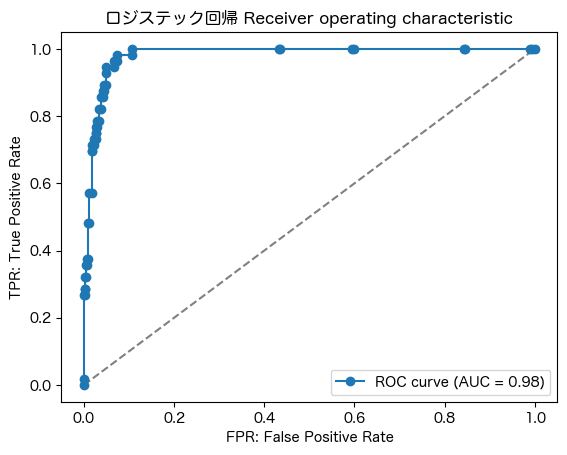

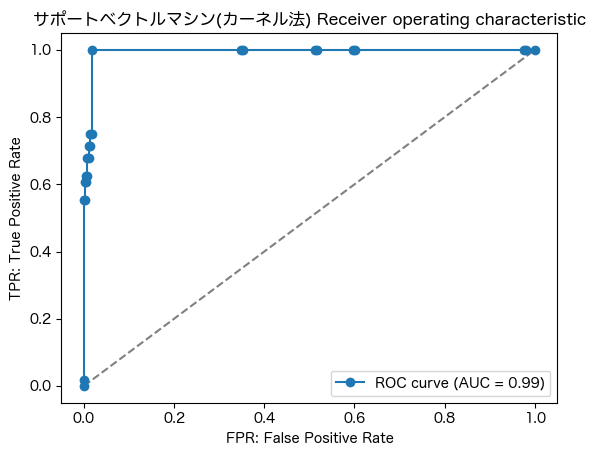

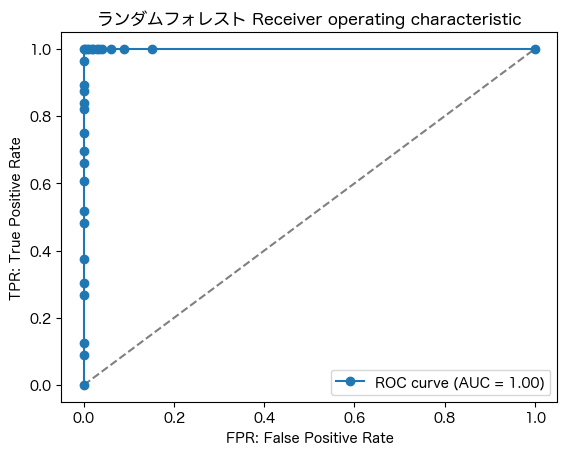

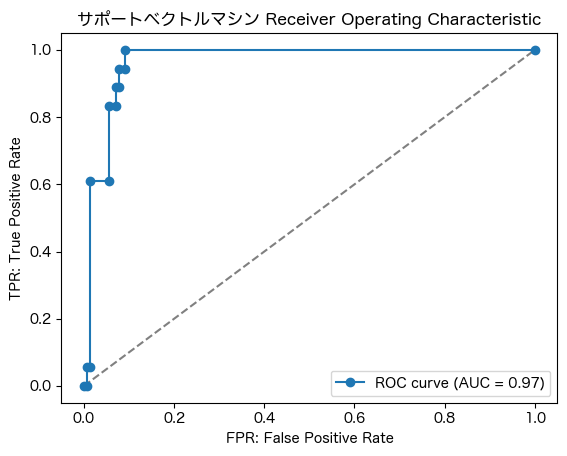

In [11]:
model_LR = LogisticRegression().fit(X_train, y_train)
model_LSVC = LinearSVC().fit(X_train, y_train)
model_SVC = SVC(probability=True).fit(X_train, y_train)
model_RFC = RandomForestClassifier().fit(X_train, y_train)

Function.roc_auc(model_LR, title_model='ロジステック回帰')
Function.roc_auc(model_SVC, 'サポートベクトルマシン(カーネル法)')
Function.roc_auc(model_RFC, title_model='ランダムフォレスト')

#サポートベクトルマシンLSVC
clf = CalibratedClassifierCV(model_LSVC)
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.plot(fpr, tpr, marker='o', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('FPR: False Positive Rate')
plt.ylabel('TPR: True Positive Rate')
plt.title('サポートベクトルマシン Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [12]:
cv = KFold(5, shuffle=True)
print('ロジステック回帰 正解率:', cross_val_score(model_LR, X_train, y_train, cv=cv, scoring='accuracy'))
print('サポートベクトルマシン 正解率:', cross_val_score(model_LSVC, X_train, y_train, cv=cv, scoring='accuracy'))
print('サポートベクトルマシン(カーネル法) 正解率:', cross_val_score(model_SVC, X_train, y_train, cv=cv, scoring='accuracy'))
print('ランダムフォレスト 正解率:', cross_val_score(model_RFC, X_train, y_train, cv=cv, scoring='accuracy'))

ロジステック回帰 正解率: [0.9375     0.9140625  0.9140625  0.8984375  0.96062992]
サポートベクトルマシン 正解率: [0.921875   0.9375     0.90625    0.125      0.88188976]
サポートベクトルマシン(カーネル法) 正解率: [0.9296875  0.984375   0.921875   0.984375   0.96062992]
ランダムフォレスト 正解率: [0.96875    1.         0.984375   1.         0.94488189]


In [13]:
Function.parameter_search(X_train, y_train)

Logistic
[0.9765625  0.9609375  0.984375   0.984375   0.95275591]
Best parameters: {'max_iter': 130, 'tol': 0.001}
Best cross-validation accuracy: 0.9718011811023622
LSVC
[0.8984375  0.90625    0.8828125  0.9375     0.93700787]
Best parameters: {'max_iter': 1000, 'C': 0.5, 'tol': 0.001}
Best cross-validation accuracy: 0.9124261811023622
SVC
[0.953125  0.9453125 0.953125  0.9375    1.       ]
Best parameters: {'C': 0.01, 'gamma': 6}
Best cross-validation accuracy: 0.9624507874015749
RandomForest
[0.984375   0.9921875  0.9921875  0.953125   0.97637795]
Best parameters: {'max_depth': 9, 'n_estimators': 100, 'random_state': 1, 'criterion': 'gini'}
Best cross-validation accuracy: 0.9921875


クラス関数の中身

In [ ]:
def model(X_train, y_train):
    model_LR = LogisticRegression()
    model_LSVC = LinearSVC()
    model_SVC = SVC(probability=True)
    model_RFC = RandomForestClassifier()

    model_LR.fit(X_train, y_train)
    model_LSVC.fit(X_train, y_train)
    model_SVC.fit(X_train, y_train)
    model_RFC.fit(X_train, y_train)

    y_predLR = model_LR.predict(X_test)
    y_predLSVC = model_LSVC.predict(X_test)
    y_predSVC = model_SVC.predict(X_test)
    y_predRFC = model_RFC.predict(X_test)

    print('ロジステック回帰 混合行列:', confusion_matrix(y_predLR, y_test))
    print('サポートベクトルマシン 混合行列:', confusion_matrix(y_predLSVC, y_test))
    print('サポートベクトルマシン(カーネル法) 混合行列:', confusion_matrix(y_predSVC, y_test))
    print('ランダムフォレスト 混合行列:', confusion_matrix(y_predRFC, y_test))
    print()
    print('ロジステック回帰 正解率:', accuracy_score(y_predLR, y_test))
    print('サポートベクトルマシン 正解率:', accuracy_score(y_predLSVC, y_test))
    print('サポートベクトルマシン(カーネル法) 正解率:', accuracy_score(y_predSVC, y_test))
    print('ランダムフォレスト 正解率:', accuracy_score(y_predRFC, y_test))
    print()
    print('ロジステック回帰 適合率:', precision_score(y_predLR, y_test))
    print('サポートベクトルマシン 適合率:', precision_score(y_predLSVC, y_test))
    print('サポートベクトルマシン(カーネル法) 適合率:', precision_score(y_predSVC, y_test))
    print('ランダムフォレスト 適合率:', precision_score(y_predRFC, y_test))
    print()
    print('ロジステック回帰 再現率:', recall_score(y_predLR, y_test))
    print('サポートベクトルマシン 再現率:', recall_score(y_predLSVC, y_test))
    print('サポートベクトルマシン(カーネル法) 再現率:', recall_score(y_predSVC, y_test))
    print('ランダムフォレスト 再現率:', recall_score(y_predRFC, y_test))
    print()
    print('ロジステック回帰 F値:', f1_score(y_predLR, y_test))
    print('サポートベクトルマシン F値:', f1_score(y_predLSVC, y_test))
    print('サポートベクトルマシン(カーネル法) F値:', f1_score(y_predSVC, y_test))
    print('ランダムフォレスト F値:', f1_score(y_predRFC, y_test))

In [ ]:
def roc_auc(model, title_model):
    y_pred_proba = model.predict_proba(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba[:, 1])

    roc_auc_score_value = roc_auc_score(y_train, y_pred_proba[:, 1])

    plt.figure()
    plt.plot([0,1], [0,1], color='gray', linestyle='--')
    plt.plot(fpr, tpr, marker='o', label='ROC curve (AUC = %0.2f)' % roc_auc_score_value)
    plt.xlabel('FPR: False Positive Rate')
    plt.ylabel('TPR: True Positive Rate')
    plt.title(title_model + ' Receiver operating characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
def parameter_search(X_train, y_train):
    cv = KFold(5, shuffle=True)

    best_score = 0
    best_params = {}
    print('Logistic')
    for max_iter in [30, 70, 100, 130]:
        for tol in [0.0001, 0.0005, 0.001]:
            model_LR = LogisticRegression(max_iter=max_iter, tol=tol)
            scores = cross_val_score(model_LR, X_train, y_train, cv=cv, scoring='accuracy')
            mean_score = scores.mean()

            if mean_score > best_score:
                best_score = mean_score
                best_params = {'max_iter': max_iter, 'tol':tol}
    print(scores)
    print('Best parameters:', best_params)
    print('Best cross-validation accuracy:', best_score)

    best_score = 0
    best_params = {}
    print('LSVC')
    for max_iter in [800, 900, 1000, 1100, 1200]:
        for C in [0.01, 0.1, 0.5, 1, 1.5]:
            for tol in [0.0001, 0.0005, 0.001]:
                model_LSVC = LinearSVC(max_iter=max_iter, C=C, tol=tol)
                scores = cross_val_score(model_LSVC, X_train, y_train, cv=cv, scoring='accuracy')
                mean_score = scores.mean()

                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {'max_iter': max_iter, 'C':C, 'tol':tol}
    print(scores)
    print('Best parameters:', best_params)
    print('Best cross-validation accuracy:', best_score)

    best_score = 0
    best_params = {}
    print('SVC')
    for C in [0.01, 0.1, 1, 10, 100]:
        for gamma in [1, 3, 5, 6, 10, 15]:
            model_LSVC = SVC(C=C, gamma=gamma)
            scores = cross_val_score(model_SVC, X_train, y_train, cv=cv, scoring='accuracy')
            mean_score = scores.mean()

            if mean_score > best_score:
                        best_score = mean_score
                        best_params = {'C': C, 'gamma': gamma}
    print(scores)
    print('Best parameters:', best_params)
    print('Best cross-validation accuracy:', best_score)


    best_score = 0
    best_params = {}
    print('RandomForest')
    for max_depth in range(1, 11):
        for n_estimators in [1, 10, 100]:
            for random_state in [0, 1, 3, 5]:
                for criterion in ['gini', 'entropy']:
                    model_RFC = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=random_state)
                    scores = cross_val_score(model_RFC, X_train, y_train, cv=cv, scoring='accuracy')
                    mean_score = scores.mean()

                    if mean_score > best_score:
                        best_score = mean_score
                        best_params = {'max_depth': max_depth, 'n_estimators': n_estimators, 'random_state': random_state, 'criterion': criterion}

    print(scores)
    print('Best parameters:', best_params)
    print('Best cross-validation accuracy:', best_score)

optunaハイパーパラメータ探索

In [14]:
#https://optuna.org/#code_examples
import optuna
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    classifier_name = trial.suggest_categorical('classifier', ['SVC', 'LinearSVC','Logistic', 'RandomForest'])
    
    if classifier_name == 'SVC':
        svc_gamma = trial.suggest_categorical('gamma', [0.1, 1, 10, 100])
        svc_c = trial.suggest_float('svc_c', 1e-10, 1e10, log=False)
        classifier_obj = SVC(C=svc_c, gamma=svc_gamma)
    elif classifier_name == 'LinearSVC':
        linearsvc_cache_size = trial.suggest_int('linearsvc_cache_size', 100, 300)
        linearsvc_c = trial.suggest_float('linearsvc_c', 1e-10, 1e10, log=False)
        classifier_obj = LinearSVC(C=linearsvc_c)
    elif classifier_name == 'Logistic':
        rogistic_tol = trial.suggest_float('tol', 0.0001, 1)
        rogistic_c = trial.suggest_float('rogistic_c', 1,10)
        rogistic_maxiter = trial.suggest_int('max_iter', 30,200)
        classifier_obj = LogisticRegression(tol=rogistic_tol, C=rogistic_c, max_iter=rogistic_maxiter)
    else:
        rf_max_depth = trial.suggest_int('rf_max_depth', 2, 10, log=False)
        rf_estimators = trial.suggest_int('n_estimators', 3, 10)
        rf_min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
        classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_estimators, min_samples_leaf=rf_min_samples_leaf)
    
    # モデルを訓練し、テストデータで評価する
    classifier_obj.fit(X_train, y_train)
    y_pred = classifier_obj.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_accuracy = study.best_value

print(f"Best params: {best_params}, Best accuracy: {best_accuracy}")

[I 2024-07-20 09:18:14,299] A new study created in memory with name: no-name-d3887be7-b80b-49cc-836c-a72accb1a219
[I 2024-07-20 09:18:14,308] Trial 0 finished with value: 0.98125 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 10, 'n_estimators': 4, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.98125.
[I 2024-07-20 09:18:14,319] Trial 1 finished with value: 0.9875 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 6, 'n_estimators': 8, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.9875.
[I 2024-07-20 09:18:14,330] Trial 2 finished with value: 0.93125 and parameters: {'classifier': 'Logistic', 'tol': 0.5451450409268386, 'rogistic_c': 4.031799766251, 'max_iter': 74}. Best is trial 1 with value: 0.9875.
[I 2024-07-20 09:18:14,347] Trial 3 finished with value: 0.9875 and parameters: {'classifier': 'Logistic', 'tol': 0.24756028029076216, 'rogistic_c': 1.49220026260714, 'max_iter': 174}. Best is trial 1 with value: 0.9875.
[I 2024-07-20 09:18:14,377

Best params: {'classifier': 'RandomForest', 'rf_max_depth': 4, 'n_estimators': 8, 'min_samples_leaf': 2}, Best accuracy: 0.99375


GridSearchハイパーパラメータ探索

In [15]:
from sklearn.model_selection import GridSearchCV

print('SVC')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],  'gamma' : [1, 3, 5, 6, 10, 15]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Test set score: {}'.format(grid_search.score(X_test, y_test)))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation: {}'.format(grid_search.best_score_))

print('RandomForest')
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10], 'n_estimators' : [0.1, 1, 10, 100], 'criterion': ['gini', 'entropy'], 'random_state': [0,1,3,5]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Test set score: {}'.format(grid_search.score(X_test, y_test)))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation: {}'.format(grid_search.best_score_))

SVC
Test set score: 0.93125
Best parameters: {'C': 10, 'gamma': 1}
Best cross-validation: 0.9029773622047245
RandomForest
Test set score: 0.9875
Best parameters: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 10, 'random_state': 5}
Best cross-validation: 0.9953001968503937
